<div class="alert alert-block alert-info">
<h2>Import packages:</h2>
</div>

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# import plotly.io as pio
# pio.renderers.default = 'png'

---

<div class="alert alert-block alert-info">
<h2>Import Data & Explore:</h2>
</div>

#### Below we have a spreadsheet with multiple tabs, so we combine them into a single dataset.

In [2]:
retail_df = pd.read_excel('/Users/walter/Desktop/REPOS/analytics-stories/Cohort-Analysis-Retail/data/online_retail_II.xlsx', sheet_name=None, index_col=None)
retail_df = pd.concat(retail_df.values())
retail_df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
541905 2011-12-09 12:50:00   2.10      12680.0          France  
541906 2011-12-09 12:50:00   4.15      12680.0          France  
541907 2011-12-09 12:50:00   4.15      12680.0          France  
541908 2011-12-09 12:50:00   4.95      12680.0          France  
541909 2011-12-09 12:50:00  18.00      12680.0          France  

[1067371 rows x 8 columns]

#### As we can see below, we have quite a few number of records with negative numbers - these might signal returns.

In [3]:
retail_df[retail_df['Quantity']<0]

Invoice StockCode                       Description  Quantity  \
178     C489449     22087          PAPER BUNTING WHITE LACE       -12   
179     C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180     C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181     C489449     21896                POTTING SHED TWINE        -6   
182     C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...         ...       ...                               ...       ...   
540449  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541  C581499         M                            Manual        -1   
541715  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate   Price  Customer ID         Country  
178    2009-12-01 10:33:00    2.95      16321.0       Australia  
179    2009-12-01 10:33:00    1.65      16321.0       Australia  
180    2009-12-01 10:33:00    4.25      16321.0       Australia  
181    2009-12-01 10:33:00    2.10      16321.0       Australia  
182    2009-12-01 10:33:00    2.95      16321.0       Australia  
...                    ...     ...          ...             ...  
540449 2011-12-09 09:57:00    0.83      14397.0  United Kingdom  
541541 2011-12-09 10:28:00  224.69      15498.0  United Kingdom  
541715 2011-12-09 11:57:00   10.95      15311.0  United Kingdom  
541716 2011-12-09 11:58:00    1.25      17315.0  United Kingdom  
541717 2011-12-09 11:58:00    1.25      17315.0  United Kingdom  

[22950 rows x 8 columns]

In [4]:
retail_df = retail_df[retail_df['Quantity']>0]
retail_df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
541905 2011-12-09 12:50:00   2.10      12680.0          France  
541906 2011-12-09 12:50:00   4.15      12680.0          France  
541907 2011-12-09 12:50:00   4.15      12680.0          France  
541908 2011-12-09 12:50:00   4.95      12680.0          France  
541909 2011-12-09 12:50:00  18.00      12680.0          France  

[1044421 rows x 8 columns]

#### Get the percent of null datapoints per column:

In [5]:
pd.DataFrame(retail_df.isnull().mean().round(4)*100, columns=['Percent Null'])

Percent Null
Invoice              0.00
StockCode            0.00
Description          0.16
Quantity             0.00
InvoiceDate          0.00
Price                0.00
Customer ID         22.86
Country              0.00

<div class="alert alert-block alert-warning">
<b>Note:</b> Approximately 23% of the data is missing for the custome IDs. We will have to drop these.
</div>

In [6]:
retail_df.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)
retail_df = retail_df.dropna(subset=['CustomerID'])
pd.DataFrame(retail_df.isnull().mean().round(4)*100, columns=['Percent Null'])

/var/folders/p3/g8_63ggs7r3g7f0s47nzvc4h0000gn/T/ipykernel_70174/3422489897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)


Percent Null
Invoice               0.0
StockCode             0.0
Description           0.0
Quantity              0.0
InvoiceDate           0.0
Price                 0.0
CustomerID            0.0
Country               0.0

<div class="alert alert-block alert-success">
<b>Note:</b> now we have no missing records.
</div>

---

<div class="alert alert-block alert-info">
<h2>Prepare Data for Cohort Analysis:</h2>
</div>

#### Fist we build a function to handle the date formats:
Convert the date column into a `datetime object` and then extract month and year.

In [7]:
def date_handler(df, col):
    # Operate on a copy to avoid SettingWithCopyWarning:
    transformed_df = df.copy()
    
    # Convert the date column to datetime and create new columns:
    transformed_df[col] = pd.to_datetime(transformed_df[col])
    
    # Group by CustomerID and get the first purchase date:
    first_purchase_df = transformed_df.groupby('CustomerID')[col].min().reset_index()
    first_purchase_df.rename(columns={col: 'FirstPurchaseDate'}, inplace=True)
    
    # Merge to get the 'FirstPurchase' column in the main dataframe:
    transformed_df = transformed_df.merge(first_purchase_df, how='left', on='CustomerID')

    # Ensure that the 'FirstPurchaseDate' is a datetime object as well:
    transformed_df['FirstPurchaseDate'] = pd.to_datetime(transformed_df['FirstPurchaseDate'])

    # Get the number of months the user is active by subtracting the invoice date from the 1st purchase date.
    # Ensure 'FirstPurchaseDate' is earlier than 'InvoiceDate' before subtracting to get 'MonthsActive':
    transformed_df['MonthsActive'] = (
        (transformed_df['InvoiceDate'].dt.year - transformed_df['FirstPurchaseDate'].dt.year) * 12
        + (transformed_df['InvoiceDate'].dt.month - transformed_df['FirstPurchaseDate'].dt.month) + 0
    )

    # # If the day of 'InvoiceDate' is earlier than the day of 'FirstPurchaseDate', subtract one month:
    # mask = transformed_df['InvoiceDate'].dt.day < transformed_df['FirstPurchaseDate'].dt.day
    # transformed_df.loc[mask, 'MonthsActive'] -= 1

    # # Ensure 'MonthsActive' is not negative (do zero if so)
    # transformed_df['MonthsActive'] = transformed_df['MonthsActive'].clip(lower=0)

    # Create Cohort Month column:
    transformed_df['CohortMonth'] = (transformed_df['FirstPurchaseDate'].dt.year.astype(str)
                                    + '-' + transformed_df['FirstPurchaseDate'].dt.month.astype(str).str.zfill(2))

    return transformed_df


In [8]:
retail_df = date_handler(retail_df, 'InvoiceDate')
retail_df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
805615  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
805616  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
805617  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
805618  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
805619  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  CustomerID         Country  \
0      2009-12-01 07:45:00   6.95     13085.0  United Kingdom   
1      2009-12-01 07:45:00   6.75     13085.0  United Kingdom   
2      2009-12-01 07:45:00   6.75     13085.0  United Kingdom   
3      2009-12-01 07:45:00   2.10     13085.0  United Kingdom   
4      2009-12-01 07:45:00   1.25     13085.0  United Kingdom   
...                    ...    ...         ...             ...   
805615 2011-12-09 12:50:00   2.10     12680.0          France   
805616 2011-12-09 12:50:00   4.15     12680.0          France   
805617 2011-12-09 12:50:00   4.15     12680.0          France   
805618 2011-12-09 12:50:00   4.95     12680.0          France   
805619 2011-12-09 12:50:00  18.00     12680.0          France   

         FirstPurchaseDate  MonthsActive CohortMonth  
0      2009-12-01 07:45:00             0     2009-12  
1      2009-12-01 07:45:00             0     2009-12  
2      2009-12-01 07:45:00             0     2009-12  
3      2009-12-01 07:45:00             0     2009-12  
4      2009-12-01 07:45:00             0     2009-12  
...                    ...           ...         ...  
805615 2011-08-18 15:44:00             4     2011-08  
805616 2011-08-18 15:44:00             4     2011-08  
805617 2011-08-18 15:44:00             4     2011-08  
805618 2011-08-18 15:44:00             4     2011-08  
805619 2011-08-18 15:44:00             4     2011-08  

[805620 rows x 11 columns]

---

<div class="alert alert-block alert-info">
<h2>Create Cohort table:</h2>
</div>

#### First, group by CohortMonth and #of months active to get the count of unique customers for that cohort month and active month combination:

In [9]:
cohort_df = retail_df.groupby(['CohortMonth', 'MonthsActive'])['CustomerID'].nunique().reset_index().rename(columns={'CustomerID': 'UniqueCustomers'})
cohort_df

CohortMonth  MonthsActive  UniqueCustomers
0       2009-12             0              955
1       2009-12             1              337
2       2009-12             2              319
3       2009-12             3              406
4       2009-12             4              363
..          ...           ...              ...
320     2011-10             1               71
321     2011-10             2               35
322     2011-11             0              192
323     2011-11             1               27
324     2011-12             0               28

[325 rows x 3 columns]

#### Create a cohort table by pivoting on the grouped dataframe from the previous step:

In [10]:
cohort_table = pd.pivot_table(data=cohort_df, columns='MonthsActive', index='CohortMonth', values='UniqueCustomers')
cohort_table.fillna('')

MonthsActive     0      1      2      3      4      5      6      7      8   \
CohortMonth                                                                   
2009-12       955.0  337.0  319.0  406.0  363.0  343.0  360.0  327.0  321.0   
2010-01       383.0   79.0  119.0  117.0  101.0  115.0   99.0   88.0  107.0   
2010-02       376.0   89.0   84.0  109.0   92.0   75.0   72.0  107.0   95.0   
2010-03       443.0   84.0  102.0  107.0  103.0   90.0  109.0  134.0  122.0   
2010-04       294.0   57.0   57.0   48.0   54.0   66.0   81.0   77.0   31.0   
2010-05       254.0   40.0   43.0   44.0   45.0   65.0   54.0   32.0   15.0   
2010-06       270.0   47.0   51.0   55.0   62.0   77.0   34.0   24.0   22.0   
2010-07       186.0   29.0   34.0   55.0   54.0   26.0   21.0   27.0   27.0   
2010-08       162.0   33.0   48.0   52.0   28.0   19.0   16.0   20.0   22.0   
2010-09       243.0   55.0   57.0   30.0   22.0   25.0   33.0   24.0   31.0   
2010-10       377.0   97.0   55.0   47.0   33.0   31.0   49.0   52.0   40.0   
2010-11       325.0   57.0   30.0   31.0   25.0   28.0   42.0   32.0   28.0   
2010-12        76.0    7.0    4.0    7.0    9.0    5.0    4.0    7.0    4.0   
2011-01        71.0   12.0   15.0   14.0   15.0   11.0   11.0    9.0    8.0   
2011-02       124.0   20.0   19.0   23.0   27.0   19.0   19.0   18.0   18.0   
2011-03       179.0   33.0   39.0   36.0   40.0   27.0   37.0   36.0   43.0   
2011-04       106.0   27.0   21.0   21.0   19.0   25.0   19.0   27.0   12.0   
2011-05       111.0   26.0   27.0   18.0   24.0   23.0   29.0   13.0          
2011-06       108.0   25.0   23.0   29.0   22.0   31.0    9.0                 
2011-07       102.0   22.0   31.0   28.0   35.0   16.0                        
2011-08       106.0   29.0   33.0   28.0   18.0                               
2011-09       189.0   51.0   71.0   28.0                                      
2011-10       221.0   71.0   35.0                                             
2011-11       192.0   27.0                                                    
2011-12        28.0                                                           

MonthsActive     9   ...     15     16     17     18     19     20     21  \
CohortMonth          ...                                                    
2009-12       346.0  ...  289.0  251.0  289.0  270.0  248.0  244.0  301.0   
2010-01       122.0  ...   58.0   90.0   76.0   71.0   75.0   93.0   74.0   
2010-02       103.0  ...   75.0   60.0   61.0   54.0   86.0   86.0   61.0   
2010-03        48.0  ...   75.0   77.0   69.0   78.0   89.0   94.0   35.0   
2010-04        32.0  ...   46.0   41.0   44.0   53.0   66.0   17.0          
2010-05        21.0  ...   32.0   35.0   42.0   39.0   12.0                 
2010-06        32.0  ...   33.0   36.0   55.0   14.0                        
2010-07        21.0  ...   32.0   44.0   15.0                               
2010-08        21.0  ...   32.0   11.0                                      
2010-09        32.0  ...   13.0                                             
2010-10        35.0  ...                                                    
2010-11        29.0  ...                                                    
2010-12         2.0  ...                                                    
2011-01        15.0  ...                                                    
2011-02        22.0  ...                                                    
2011-03        17.0  ...                                                    
2011-04              ...                                                    
2011-05              ...                                                    
2011-06              ...                                                    
2011-07              ...                                                    
2011-08              ...                                                    
2011-09              ...                                                    
2011-10           

#### We can get the percent of each cohort that remains per active month:

In [11]:
cohort_table_percent = (cohort_table.divide(cohort_table.iloc[:, 0], axis=0)*100).round()
cohort_table_percent.fillna('')

MonthsActive     0     1     2     3     4     5     6     7     8     9   \
CohortMonth                                                                 
2009-12       100.0  35.0  33.0  43.0  38.0  36.0  38.0  34.0  34.0  36.0   
2010-01       100.0  21.0  31.0  31.0  26.0  30.0  26.0  23.0  28.0  32.0   
2010-02       100.0  24.0  22.0  29.0  24.0  20.0  19.0  28.0  25.0  27.0   
2010-03       100.0  19.0  23.0  24.0  23.0  20.0  25.0  30.0  28.0  11.0   
2010-04       100.0  19.0  19.0  16.0  18.0  22.0  28.0  26.0  11.0  11.0   
2010-05       100.0  16.0  17.0  17.0  18.0  26.0  21.0  13.0   6.0   8.0   
2010-06       100.0  17.0  19.0  20.0  23.0  29.0  13.0   9.0   8.0  12.0   
2010-07       100.0  16.0  18.0  30.0  29.0  14.0  11.0  15.0  15.0  11.0   
2010-08       100.0  20.0  30.0  32.0  17.0  12.0  10.0  12.0  14.0  13.0   
2010-09       100.0  23.0  23.0  12.0   9.0  10.0  14.0  10.0  13.0  13.0   
2010-10       100.0  26.0  15.0  12.0   9.0   8.0  13.0  14.0  11.0   9.0   
2010-11       100.0  18.0   9.0  10.0   8.0   9.0  13.0  10.0   9.0   9.0   
2010-12       100.0   9.0   5.0   9.0  12.0   7.0   5.0   9.0   5.0   3.0   
2011-01       100.0  17.0  21.0  20.0  21.0  15.0  15.0  13.0  11.0  21.0   
2011-02       100.0  16.0  15.0  19.0  22.0  15.0  15.0  15.0  15.0  18.0   
2011-03       100.0  18.0  22.0  20.0  22.0  15.0  21.0  20.0  24.0   9.0   
2011-04       100.0  25.0  20.0  20.0  18.0  24.0  18.0  25.0  11.0         
2011-05       100.0  23.0  24.0  16.0  22.0  21.0  26.0  12.0               
2011-06       100.0  23.0  21.0  27.0  20.0  29.0   8.0                     
2011-07       100.0  22.0  30.0  27.0  34.0  16.0                           
2011-08       100.0  27.0  31.0  26.0  17.0                                 
2011-09       100.0  27.0  38.0  15.0                                       
2011-10       100.0  32.0  16.0                                             
2011-11       100.0  14.0                                                   
2011-12       100.0                                                         

MonthsActive  ...    15    16    17    18    19    20    21    22    23    24  
CohortMonth   ...                                                              
2009-12       ...  30.0  26.0  30.0  28.0  26.0  26.0  32.0  30.0  41.0  20.0  
2010-01       ...  15.0  23.0  20.0  19.0  20.0  24.0  19.0  25.0   6.0        
2010-02       ...  20.0  16.0  16.0  14.0  23.0  23.0  16.0   6.0              
2010-03       ...  17.0  17.0  16.0  18.0  20.0  21.0   8.0                    
2010-04       ...  16.0  14.0  15.0  18.0  22.0   6.0                          
2010-05       ...  13.0  14.0  17.0  15.0   5.0                                
2010-06       ...  12.0  13.0  20.0   5.0                                      
2010-07       ...  17.0  24.0   8.0                                            
2010-08       ...  20.0   7.0                                                  
2010-09       ...   5.0                                                        
2010-10       ...                                                              
2010-11       ...                                                              
2010-12       ...                                                              
2011-01       ...                                                              
2011-02       ...                                                              
2011-03       ...                                                              
2011-04       ...                                                              
2011-05       ...                                                              
2011-06       ...                                                              
2011-07       ...                                                              
2011-08       ...                                                              
2011-09       ...                                                              


---

<div class="alert alert-block alert-info">
<h2>Visualize Cohort table:</h2>
</div>

#### Create a function to plot the cohort table:

In [12]:
def plot_cohort_table(df, heat_legend, colormap):
    # Convert the percentage values to a formatted string
    text_values = df.map('{:.2f}%'.format)
    
    # Create the heatmap with Plotly Express and display cell values
    fig = px.imshow(
        df,
        labels=dict(x="Months Active", y="Cohort Month", color=heat_legend),
        x=df.columns,
        y=df.index,
        text_auto=True,  # You can set this to False if you're providing z_text
        # If you want specific formatting or to use the text_values from above, comment out text_auto and use:
        # z_text=text_values.values,
        color_continuous_scale=colormap
    )
    
    # Update the layout
    fig.update_layout(
        title='Cohort Analysis',
        xaxis=dict(side="bottom", tickvals=df.columns),
        yaxis=dict(tickvals=df.index),
        height=800
    )
    
    # Show the figure
    return fig.show(width=1600)

#### Plot Raw Cohort Table:

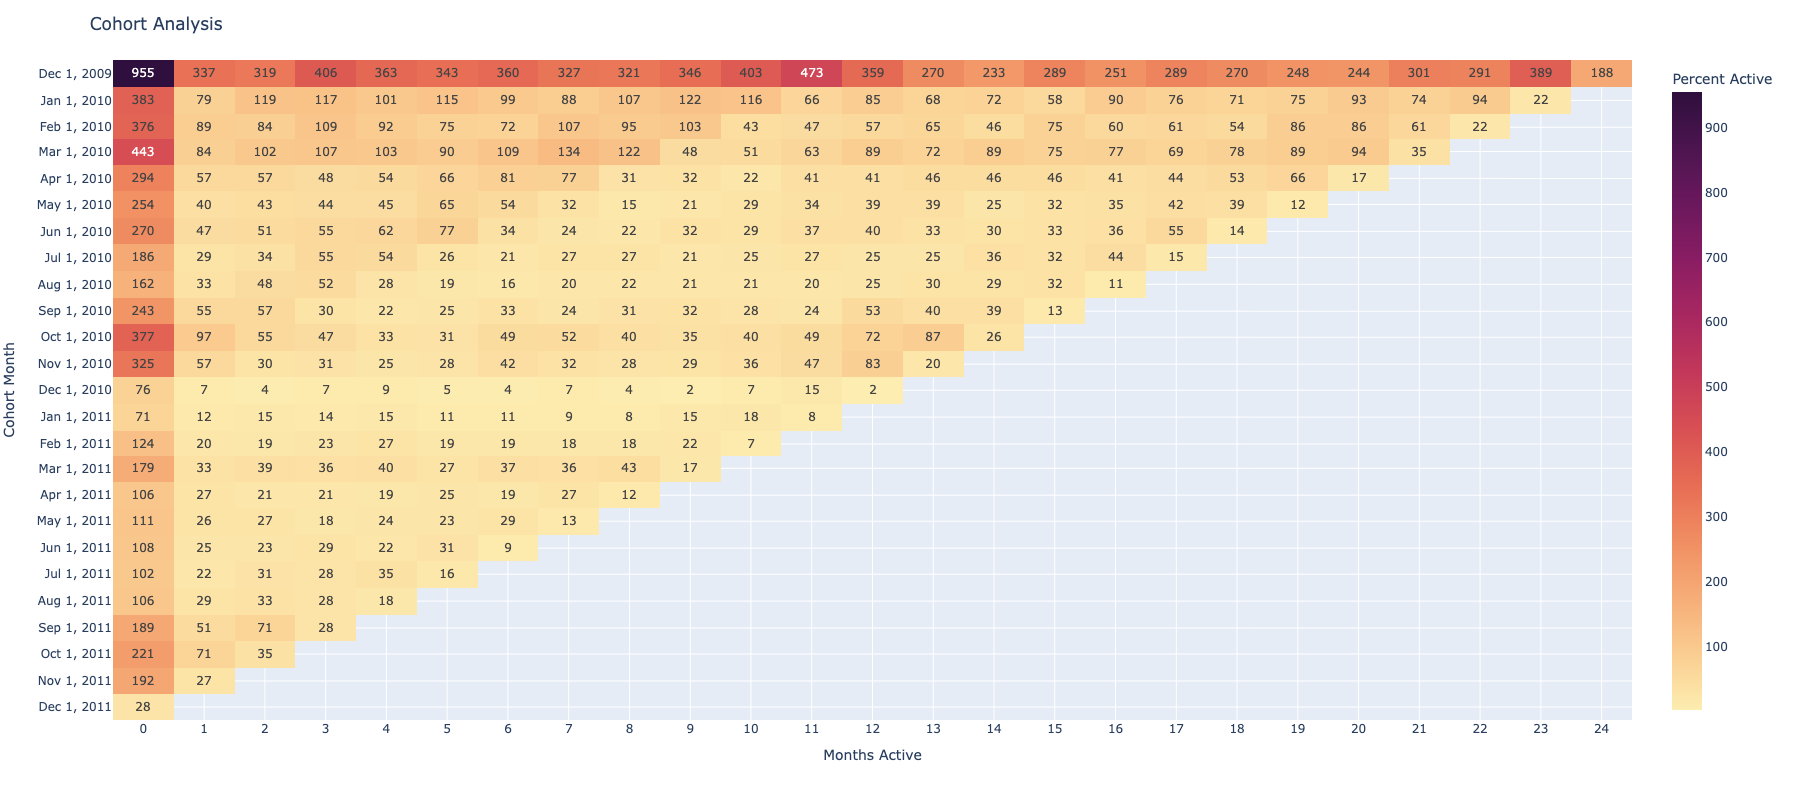

In [13]:
plot_cohort_table(cohort_table, 'Percent Active', 'Matter')

#### Plot Normalized Cohort Table:

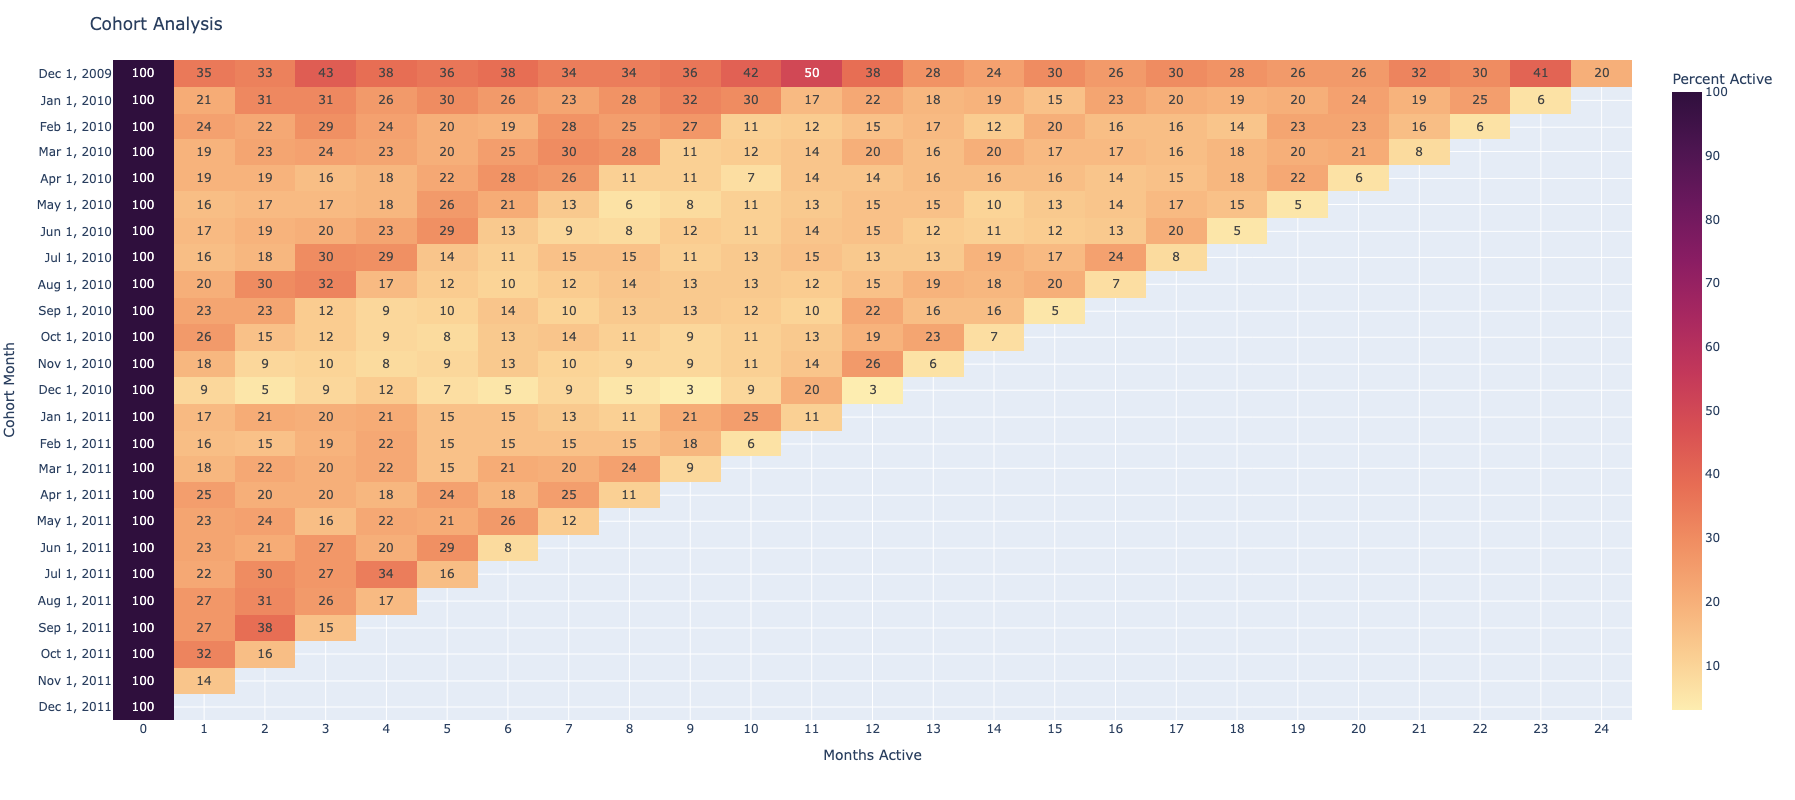

In [14]:
plot_cohort_table(cohort_table_percent, 'Percent Active', 'Matter')

---

<div class="alert alert-block alert-info">
<h2>Let's create a similar table but we are going to look at the Cohort LTV this time:</h2>
</div>

#### Begin with the preprocessed retail_df and go from there:

In [15]:
retail_df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
805615  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
805616  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
805617  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
805618  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
805619  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  CustomerID         Country  \
0      2009-12-01 07:45:00   6.95     13085.0  United Kingdom   
1      2009-12-01 07:45:00   6.75     13085.0  United Kingdom   
2      2009-12-01 07:45:00   6.75     13085.0  United Kingdom   
3      2009-12-01 07:45:00   2.10     13085.0  United Kingdom   
4      2009-12-01 07:45:00   1.25     13085.0  United Kingdom   
...                    ...    ...         ...             ...   
805615 2011-12-09 12:50:00   2.10     12680.0          France   
805616 2011-12-09 12:50:00   4.15     12680.0          France   
805617 2011-12-09 12:50:00   4.15     12680.0          France   
805618 2011-12-09 12:50:00   4.95     12680.0          France   
805619 2011-12-09 12:50:00  18.00     12680.0          France   

         FirstPurchaseDate  MonthsActive CohortMonth  
0      2009-12-01 07:45:00             0     2009-12  
1      2009-12-01 07:45:00             0     2009-12  
2      2009-12-01 07:45:00             0     2009-12  
3      2009-12-01 07:45:00             0     2009-12  
4      2009-12-01 07:45:00             0     2009-12  
...                    ...           ...         ...  
805615 2011-08-18 15:44:00             4     2011-08  
805616 2011-08-18 15:44:00             4     2011-08  
805617 2011-08-18 15:44:00             4     2011-08  
805618 2011-08-18 15:44:00             4     2011-08  
805619 2011-08-18 15:44:00             4     2011-08  

[805620 rows x 11 columns]

#### Calculate the order total from unit price and quantity:

In [16]:
retail_df['OrderTotal'] = retail_df['Price']*retail_df['Quantity']
retail_df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
805615  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
805616  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
805617  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
805618  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
805619  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  CustomerID         Country  \
0      2009-12-01 07:45:00   6.95     13085.0  United Kingdom   
1      2009-12-01 07:45:00   6.75     13085.0  United Kingdom   
2      2009-12-01 07:45:00   6.75     13085.0  United Kingdom   
3      2009-12-01 07:45:00   2.10     13085.0  United Kingdom   
4      2009-12-01 07:45:00   1.25     13085.0  United Kingdom   
...                    ...    ...         ...             ...   
805615 2011-12-09 12:50:00   2.10     12680.0          France   
805616 2011-12-09 12:50:00   4.15     12680.0          France   
805617 2011-12-09 12:50:00   4.15     12680.0          France   
805618 2011-12-09 12:50:00   4.95     12680.0          France   
805619 2011-12-09 12:50:00  18.00     12680.0          France   

         FirstPurchaseDate  MonthsActive CohortMonth  OrderTotal  
0      2009-12-01 07:45:00             0     2009-12       83.40  
1      2009-12-01 07:45:00             0     2009-12       81.00  
2      2009-12-01 07:45:00             0     2009-12       81.00  
3      2009-12-01 07:45:00             0     2009-12      100.80  
4      2009-12-01 07:45:00             0     2009-12       30.00  
...                    ...           ...         ...         ...  
805615 2011-08-18 15:44:00             4     2011-08       12.60  
805616 2011-08-18 15:44:00             4     2011-08       16.60  
805617 2011-08-18 15:44:00             4     2011-08       16.60  
805618 2011-08-18 15:44:00             4     2011-08       14.85  
805619 2011-08-18 15:44:00             4     2011-08       18.00  

[805620 rows x 12 columns]

#### First group by CohortMonth and #of months active to get the sum of OrderTotal for that cohort month and active month combination:

In [17]:
cohort_ltv_df = retail_df.groupby(['CohortMonth', 'MonthsActive']).agg(
    TotalOrderValue=('OrderTotal', 'sum'),
    UniqueCustomers=('CustomerID', 'nunique')).reset_index()
cohort_ltv_df

# cohort_ltv_df = retail_df.groupby(['CohortMonth', 'MonthsActive']).agg(
#     TotalOrderValue=('OrderTotal', 'sum'),
#     UniqueCustomers=('CustomerID', 'count')).reset_index()
# cohort_ltv_df

CohortMonth  MonthsActive  TotalOrderValue  UniqueCustomers
0       2009-12             0       686654.160              955
1       2009-12             1       395425.571              337
2       2009-12             2       296802.132              319
3       2009-12             3       379654.490              406
4       2009-12             4       306885.820              363
..          ...           ...              ...              ...
320     2011-10             1        33768.660               71
321     2011-10             2        11052.570               35
322     2011-11             0        81260.190              192
323     2011-11             1        12868.970               27
324     2011-12             0        23844.090               28

[325 rows x 4 columns]

#### Get the average order value per customer for each of the cohort months and months active:

In [18]:
cohort_ltv_df['AvgCohortOrderValue'] = (cohort_ltv_df['TotalOrderValue']/cohort_ltv_df['UniqueCustomers']).round(2)
cohort_ltv_df

CohortMonth  MonthsActive  TotalOrderValue  UniqueCustomers  \
0       2009-12             0       686654.160              955   
1       2009-12             1       395425.571              337   
2       2009-12             2       296802.132              319   
3       2009-12             3       379654.490              406   
4       2009-12             4       306885.820              363   
..          ...           ...              ...              ...   
320     2011-10             1        33768.660               71   
321     2011-10             2        11052.570               35   
322     2011-11             0        81260.190              192   
323     2011-11             1        12868.970               27   
324     2011-12             0        23844.090               28   

     AvgCohortOrderValue  
0                 719.01  
1                1173.37  
2                 930.41  
3                 935.11  
4                 845.42  
..                   ...  
320               475.61  
321               315.79  
322               423.23  
323               476.63  
324               851.57  

[325 rows x 5 columns]

<div class="alert alert-block alert-info">
<h2>Build Cohort LTV table:</h2>
</div>

#### Create a pivot table:

In [19]:
cohort_ltv_table = pd.pivot_table(data=cohort_ltv_df, columns='MonthsActive', index='CohortMonth', values='AvgCohortOrderValue')
cohort_ltv_table.fillna('')

MonthsActive      0        1        2        3        4       5       6   \
CohortMonth                                                                
2009-12       719.01  1173.37   930.41   935.11   845.42  891.99  841.27   
2010-01       422.70   495.37   429.58   493.41   582.78  531.98  526.34   
2010-02       453.28   374.91   653.41   489.87   478.53  530.38  557.82   
2010-03       531.53   595.33    509.5   605.52   489.84  622.95  601.99   
2010-04       425.51   333.97   363.41   627.46   413.15  467.37  435.08   
2010-05       436.10   341.86    329.8   292.12    374.7  481.94  433.42   
2010-06       488.25   342.92   443.26   470.94   565.54  630.68  748.99   
2010-07       405.26   289.55   406.16   454.68   535.62  609.13  434.23   
2010-08       377.52   419.09   482.27   452.78    800.2  285.93   331.7   
2010-09       659.12   541.27   567.42   718.27  1193.57  332.03  791.93   
2010-10       493.50   482.67   530.39   517.38   391.93  363.77   360.5   
2010-11       474.03   648.03   475.16   311.71    390.6  382.28  374.48   
2010-12       532.48   335.24  1751.82   206.21   683.15  213.85  182.53   
2011-01       718.20   315.34   266.11  1890.42   538.54  586.08  465.08   
2011-02       354.12   426.32   863.85   463.04    342.4  292.74  419.58   
2011-03       436.85   474.42   524.32   467.66   416.22  401.25  421.76   
2011-04       388.31   495.79   368.03   345.43   304.98  448.63  324.04   
2011-05       473.09    359.1   384.34   358.28   440.72  456.19  491.45   
2011-06       780.65   411.64   343.44   378.04   448.01  475.93  276.13   
2011-07       431.16   347.49   371.64   438.13   429.55  283.05           
2011-08       425.10   644.23   952.36  1430.38   775.87                   
2011-09       510.68   399.15   442.62   365.92                            
2011-10       491.98   475.61   315.79                                     
2011-11       423.23   476.63                                              
2011-12       851.57                                                       

MonthsActive        7        8        9   ...      15       16      17  \
CohortMonth                               ...                            
2009-12         958.72  1035.82  1134.79  ...  889.25   650.77  991.76   
2010-01         547.62   566.39   613.05  ...  535.83   554.88   539.1   
2010-02         479.85    558.3   533.36  ...  507.44   500.94  547.68   
2010-03         609.17   629.71   734.27  ...  424.51   556.55  725.14   
2010-04         425.65   494.75   553.06  ...  488.61   435.96  441.45   
2010-05         430.45   392.22   344.68  ...   459.9   634.96  422.36   
2010-06         719.97   1085.5   891.76  ...  567.52  1069.08  510.96   
2010-07         389.68   386.17   476.02  ...  491.18   515.84  478.89   
2010-08          364.4   448.34   468.53  ...   620.4   510.92           
2010-09         452.83   950.44   460.23  ...  427.15                    
2010-10         309.63    557.2   557.74  ...                            
2010-11         349.44   344.26   381.93  ...                            
2010-12         693.89   150.27   250.42  ...                            
2011-01         616.17   563.27   762.83  ...                            
2011-02          560.5   529.37   560.53  ...                            
2011-03          521.6   510.56    377.0  ...                            
2011-04         424.15   327.06           ...                            
2011-05       13282.07                    ...                            
2011-06                                   ...                            
2011-07                                   ...                            
2011-08                                   ...                            
2011-09                                   ...                            
2011-10                                   ...                            
2011-11                                   ...                            
2011-12                

#### Plot to see avg. order for each cohort and month active combination (average spend per active month):

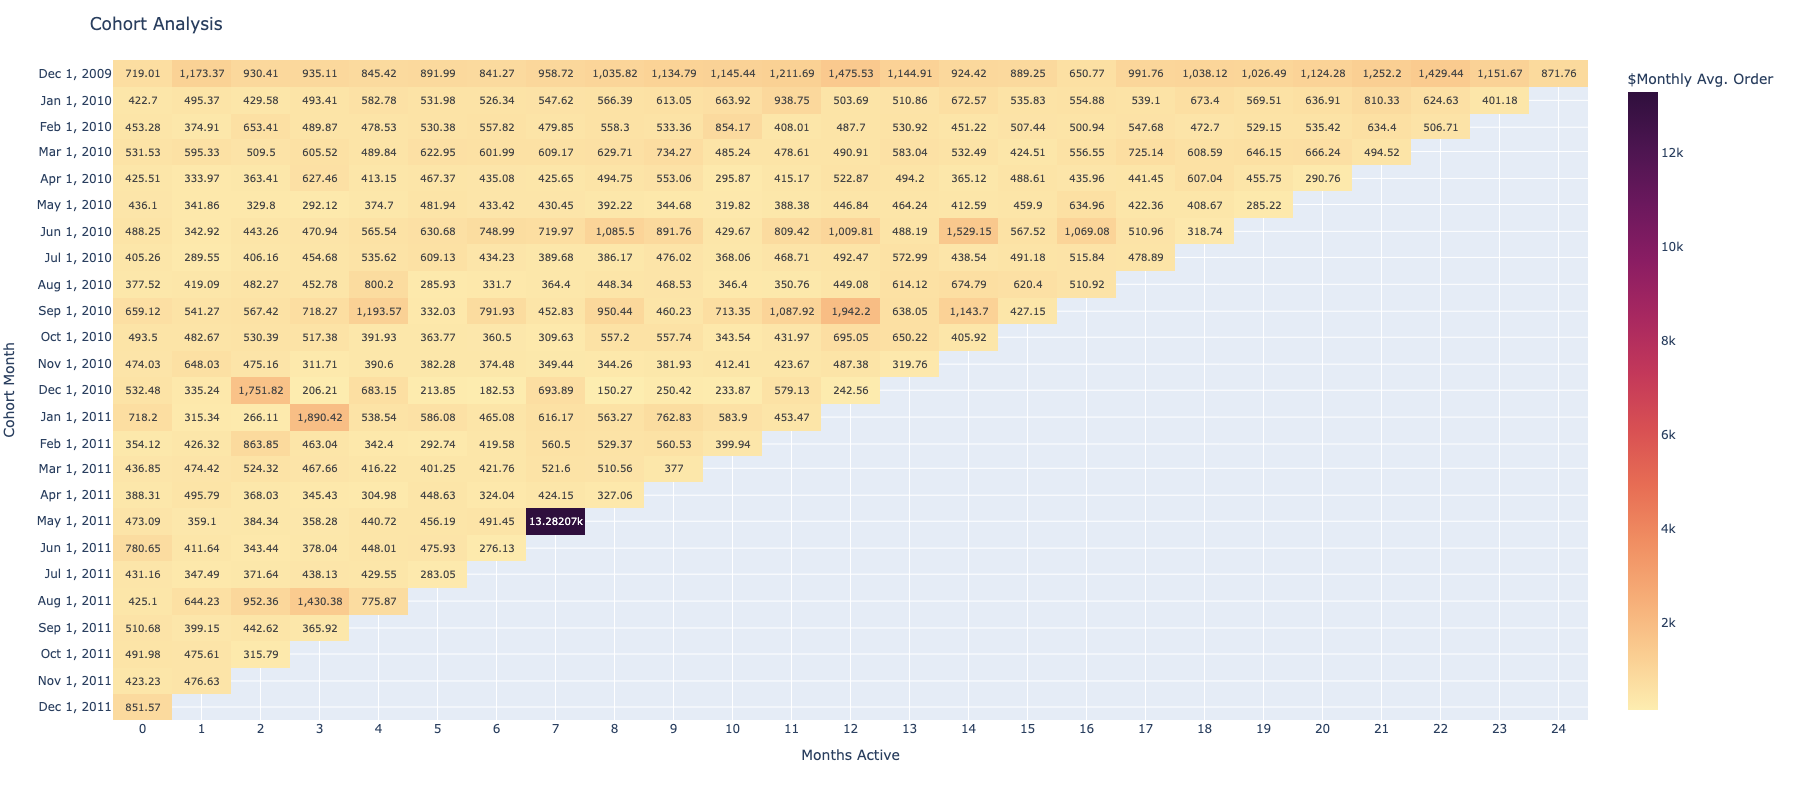

In [20]:
plot_cohort_table(cohort_ltv_table, '$Monthly Avg. Order', 'Matter')

#### Get the cumulative sum for each cohort month and months active:

In [21]:
cohort_ltv_cumulative = cohort_ltv_table.cumsum(axis=1)
cohort_ltv_cumulative.fillna('')

MonthsActive      0        1        2        3        4        5        6   \
CohortMonth                                                                  
2009-12       719.01  1892.38  2822.79   3757.9  4603.32  5495.31  6336.58   
2010-01       422.70   918.07  1347.65  1841.06  2423.84  2955.82  3482.16   
2010-02       453.28   828.19   1481.6  1971.47   2450.0  2980.38   3538.2   
2010-03       531.53  1126.86  1636.36  2241.88  2731.72  3354.67  3956.66   
2010-04       425.51   759.48  1122.89  1750.35   2163.5  2630.87  3065.95   
2010-05       436.10   777.96  1107.76  1399.88  1774.58  2256.52  2689.94   
2010-06       488.25   831.17  1274.43  1745.37  2310.91  2941.59  3690.58   
2010-07       405.26   694.81  1100.97  1555.65  2091.27   2700.4  3134.63   
2010-08       377.52   796.61  1278.88  1731.66  2531.86  2817.79  3149.49   
2010-09       659.12  1200.39  1767.81  2486.08  3679.65  4011.68  4803.61   
2010-10       493.50   976.17  1506.56  2023.94  2415.87  2779.64  3140.14   
2010-11       474.03  1122.06  1597.22  1908.93  2299.53  2681.81  3056.29   
2010-12       532.48   867.72  2619.54  2825.75   3508.9  3722.75  3905.28   
2011-01       718.20  1033.54  1299.65  3190.07  3728.61  4314.69  4779.77   
2011-02       354.12   780.44  1644.29  2107.33  2449.73  2742.47  3162.05   
2011-03       436.85   911.27  1435.59  1903.25  2319.47  2720.72  3142.48   
2011-04       388.31    884.1  1252.13  1597.56  1902.54  2351.17  2675.21   
2011-05       473.09   832.19  1216.53  1574.81  2015.53  2471.72  2963.17   
2011-06       780.65  1192.29  1535.73  1913.77  2361.78  2837.71  3113.84   
2011-07       431.16   778.65  1150.29  1588.42  2017.97  2301.02            
2011-08       425.10  1069.33  2021.69  3452.07  4227.94                     
2011-09       510.68   909.83  1352.45  1718.37                              
2011-10       491.98   967.59  1283.38                                       
2011-11       423.23   899.86                                                
2011-12       851.57                                                         

MonthsActive        7        8        9   ...        15        16        17  \
CohortMonth                               ...                                 
2009-12         7295.3  8331.12  9465.91  ...  16257.15  16907.92  17899.68   
2010-01        4029.78  4596.17  5209.22  ...   9034.84   9589.72  10128.82   
2010-02        4018.05  4576.35  5109.71  ...   8349.17   8850.11   9397.79   
2010-03        4565.83  5195.54  5929.81  ...   8924.61   9481.16   10206.3   
2010-04         3491.6  3986.35  4539.41  ...   7121.25   7557.21   7998.66   
2010-05        3120.39  3512.61  3857.29  ...   6349.06   6984.02   7406.38   
2010-06        4410.55  5496.05  6387.81  ...  11221.57  12290.65  12801.61   
2010-07        3524.31  3910.48   4386.5  ...   7218.45   7734.29   8213.18   
2010-08        3513.89  3962.23  4430.76  ...   7486.31   7997.23             
2010-09        5256.44  6206.88  6667.11  ...  12619.48                       
2010-10        3449.77  4006.97  4564.71  ...                                 
2010-11        3405.73  3749.99  4131.92  ...                                 
2010-12        4599.17  4749.44  4999.86  ...                                 
2011-01        5395.94  5959.21  6722.04  ...                                 
2011-02        3722.55  4251.92  4812.45  ...                                 
2011-03        3664.08  4174.64  4551.64  ...                                 
2011-04        3099.36  3426.42           ...                                 
2011-05       16245.24                    ...                                 
2011-06                                   ...                                 
2011-07                                   ...                                 
2011-08                                   ...                                 
2011-09                                   ...                               

#### Plot cumulative sum table to get the LTV of each cohort and months active combination:

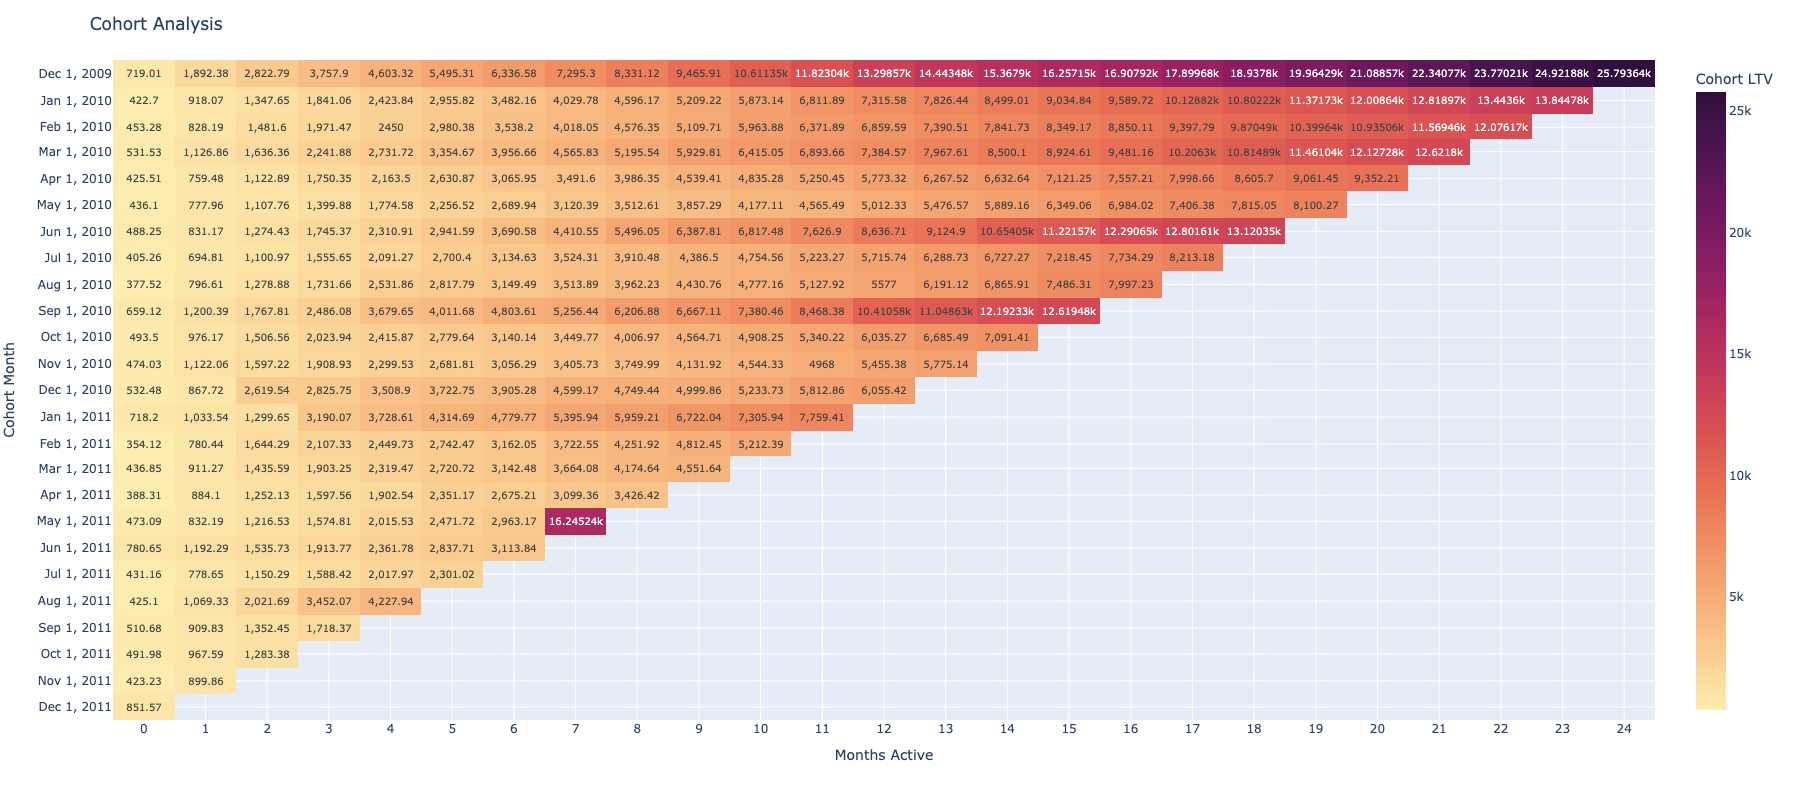

In [22]:
plot_cohort_table(cohort_ltv_cumulative, 'Cohort LTV', 'Matter')

<div class="alert alert-block alert-info">
<h2>Investigate correlation between average order size and engagement (active month):</h2>
</div>

In [23]:
engagement_corr_df = cohort_table_percent.copy()
engagement_corr_df.fillna('')

MonthsActive     0     1     2     3     4     5     6     7     8     9   \
CohortMonth                                                                 
2009-12       100.0  35.0  33.0  43.0  38.0  36.0  38.0  34.0  34.0  36.0   
2010-01       100.0  21.0  31.0  31.0  26.0  30.0  26.0  23.0  28.0  32.0   
2010-02       100.0  24.0  22.0  29.0  24.0  20.0  19.0  28.0  25.0  27.0   
2010-03       100.0  19.0  23.0  24.0  23.0  20.0  25.0  30.0  28.0  11.0   
2010-04       100.0  19.0  19.0  16.0  18.0  22.0  28.0  26.0  11.0  11.0   
2010-05       100.0  16.0  17.0  17.0  18.0  26.0  21.0  13.0   6.0   8.0   
2010-06       100.0  17.0  19.0  20.0  23.0  29.0  13.0   9.0   8.0  12.0   
2010-07       100.0  16.0  18.0  30.0  29.0  14.0  11.0  15.0  15.0  11.0   
2010-08       100.0  20.0  30.0  32.0  17.0  12.0  10.0  12.0  14.0  13.0   
2010-09       100.0  23.0  23.0  12.0   9.0  10.0  14.0  10.0  13.0  13.0   
2010-10       100.0  26.0  15.0  12.0   9.0   8.0  13.0  14.0  11.0   9.0   
2010-11       100.0  18.0   9.0  10.0   8.0   9.0  13.0  10.0   9.0   9.0   
2010-12       100.0   9.0   5.0   9.0  12.0   7.0   5.0   9.0   5.0   3.0   
2011-01       100.0  17.0  21.0  20.0  21.0  15.0  15.0  13.0  11.0  21.0   
2011-02       100.0  16.0  15.0  19.0  22.0  15.0  15.0  15.0  15.0  18.0   
2011-03       100.0  18.0  22.0  20.0  22.0  15.0  21.0  20.0  24.0   9.0   
2011-04       100.0  25.0  20.0  20.0  18.0  24.0  18.0  25.0  11.0         
2011-05       100.0  23.0  24.0  16.0  22.0  21.0  26.0  12.0               
2011-06       100.0  23.0  21.0  27.0  20.0  29.0   8.0                     
2011-07       100.0  22.0  30.0  27.0  34.0  16.0                           
2011-08       100.0  27.0  31.0  26.0  17.0                                 
2011-09       100.0  27.0  38.0  15.0                                       
2011-10       100.0  32.0  16.0                                             
2011-11       100.0  14.0                                                   
2011-12       100.0                                                         

MonthsActive  ...    15    16    17    18    19    20    21    22    23    24  
CohortMonth   ...                                                              
2009-12       ...  30.0  26.0  30.0  28.0  26.0  26.0  32.0  30.0  41.0  20.0  
2010-01       ...  15.0  23.0  20.0  19.0  20.0  24.0  19.0  25.0   6.0        
2010-02       ...  20.0  16.0  16.0  14.0  23.0  23.0  16.0   6.0              
2010-03       ...  17.0  17.0  16.0  18.0  20.0  21.0   8.0                    
2010-04       ...  16.0  14.0  15.0  18.0  22.0   6.0                          
2010-05       ...  13.0  14.0  17.0  15.0   5.0                                
2010-06       ...  12.0  13.0  20.0   5.0                                      
2010-07       ...  17.0  24.0   8.0                                            
2010-08       ...  20.0   7.0                                                  
2010-09       ...   5.0                                                        
2010-10       ...                                                              
2010-11       ...                                                              
2010-12       ...                                                              
2011-01       ...                                                              
2011-02       ...                                                              
2011-03       ...                                                              
2011-04       ...                                                              
2011-05       ...                                                              
2011-06       ...                                                              
2011-07       ...                                                              
2011-08       ...                                                              
2011-09       ...                                                              


In [24]:
ordersize_corr_df = cohort_ltv_table.copy()
ordersize_corr_df.fillna('')

MonthsActive      0        1        2        3        4       5       6   \
CohortMonth                                                                
2009-12       719.01  1173.37   930.41   935.11   845.42  891.99  841.27   
2010-01       422.70   495.37   429.58   493.41   582.78  531.98  526.34   
2010-02       453.28   374.91   653.41   489.87   478.53  530.38  557.82   
2010-03       531.53   595.33    509.5   605.52   489.84  622.95  601.99   
2010-04       425.51   333.97   363.41   627.46   413.15  467.37  435.08   
2010-05       436.10   341.86    329.8   292.12    374.7  481.94  433.42   
2010-06       488.25   342.92   443.26   470.94   565.54  630.68  748.99   
2010-07       405.26   289.55   406.16   454.68   535.62  609.13  434.23   
2010-08       377.52   419.09   482.27   452.78    800.2  285.93   331.7   
2010-09       659.12   541.27   567.42   718.27  1193.57  332.03  791.93   
2010-10       493.50   482.67   530.39   517.38   391.93  363.77   360.5   
2010-11       474.03   648.03   475.16   311.71    390.6  382.28  374.48   
2010-12       532.48   335.24  1751.82   206.21   683.15  213.85  182.53   
2011-01       718.20   315.34   266.11  1890.42   538.54  586.08  465.08   
2011-02       354.12   426.32   863.85   463.04    342.4  292.74  419.58   
2011-03       436.85   474.42   524.32   467.66   416.22  401.25  421.76   
2011-04       388.31   495.79   368.03   345.43   304.98  448.63  324.04   
2011-05       473.09    359.1   384.34   358.28   440.72  456.19  491.45   
2011-06       780.65   411.64   343.44   378.04   448.01  475.93  276.13   
2011-07       431.16   347.49   371.64   438.13   429.55  283.05           
2011-08       425.10   644.23   952.36  1430.38   775.87                   
2011-09       510.68   399.15   442.62   365.92                            
2011-10       491.98   475.61   315.79                                     
2011-11       423.23   476.63                                              
2011-12       851.57                                                       

MonthsActive        7        8        9   ...      15       16      17  \
CohortMonth                               ...                            
2009-12         958.72  1035.82  1134.79  ...  889.25   650.77  991.76   
2010-01         547.62   566.39   613.05  ...  535.83   554.88   539.1   
2010-02         479.85    558.3   533.36  ...  507.44   500.94  547.68   
2010-03         609.17   629.71   734.27  ...  424.51   556.55  725.14   
2010-04         425.65   494.75   553.06  ...  488.61   435.96  441.45   
2010-05         430.45   392.22   344.68  ...   459.9   634.96  422.36   
2010-06         719.97   1085.5   891.76  ...  567.52  1069.08  510.96   
2010-07         389.68   386.17   476.02  ...  491.18   515.84  478.89   
2010-08          364.4   448.34   468.53  ...   620.4   510.92           
2010-09         452.83   950.44   460.23  ...  427.15                    
2010-10         309.63    557.2   557.74  ...                            
2010-11         349.44   344.26   381.93  ...                            
2010-12         693.89   150.27   250.42  ...                            
2011-01         616.17   563.27   762.83  ...                            
2011-02          560.5   529.37   560.53  ...                            
2011-03          521.6   510.56    377.0  ...                            
2011-04         424.15   327.06           ...                            
2011-05       13282.07                    ...                            
2011-06                                   ...                            
2011-07                                   ...                            
2011-08                                   ...                            
2011-09                                   ...                            
2011-10                                   ...                            
2011-11                                   ...                            
2011-12                

In [25]:
# Flatten the engagement DataFrame
engagement_long = engagement_corr_df.reset_index().melt(id_vars='CohortMonth', var_name='MonthsActive', value_name='Engagement')
engagement_long['MonthsActive'] = engagement_long['MonthsActive'].astype(int)  # Ensure MonthsActive is an integer
engagement_long.dropna(inplace=True)

# Flatten the ordersize DataFrame
ordersize_long = ordersize_corr_df.reset_index().melt(id_vars='CohortMonth', var_name='MonthsActive', value_name='OrderSize')
ordersize_long['MonthsActive'] = ordersize_long['MonthsActive'].astype(int)  # Ensure MonthsActive is an integer
ordersize_long.dropna(inplace=True)

# Merge the two DataFrames on CohortMonth and MonthsActive
merged_df = pd.merge(engagement_long, ordersize_long, on=['CohortMonth', 'MonthsActive'])

# Calculate the correlation
correlation = merged_df[['Engagement', 'OrderSize']].corr()

print(correlation)


            Engagement  OrderSize
Engagement    1.000000  -0.005194
OrderSize    -0.005194   1.000000


<div class="alert alert-block alert-success">
<b>Note:</b> as the output above indicates, the correlation is very weak.
</div>

---

<div class="alert alert-block alert-info">
<h2>Now we take a look at Acquisition - Plot to track new customers acquired every month.</h2>
</div>

#### We'll use the same cohort table we built earlier:

In [26]:
cohort_table.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24],
      dtype='int32', name='MonthsActive')

#### Use '1' as the column name since it represents the first month for each batch of new customers:

In [27]:
cohort_table[1].head(5)

CohortMonth
2009-12    337.0
2010-01     79.0
2010-02     89.0
2010-03     84.0
2010-04     57.0
Name: 1, dtype: float64

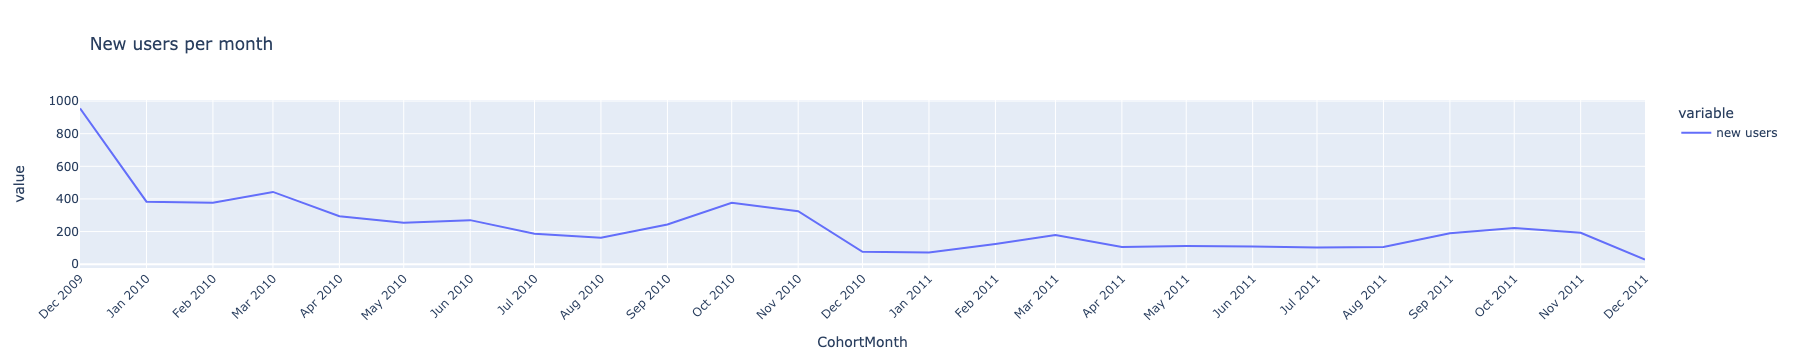

In [28]:
# create figure object:
fig = px.line(cohort_table[0], title='New users per month')

# rename legend:
for trace in fig.data:
    trace.name = 'new users'
    
#update x-axis:
fig.update_xaxes(tickangle=-45, nticks=len(cohort_table.columns))
fig.show()

<div class="alert alert-block alert-info">
<h2>Let's take a look at the average spend per cohort.</h2>
</div>

In [29]:
cohort_ltv_df

CohortMonth  MonthsActive  TotalOrderValue  UniqueCustomers  \
0       2009-12             0       686654.160              955   
1       2009-12             1       395425.571              337   
2       2009-12             2       296802.132              319   
3       2009-12             3       379654.490              406   
4       2009-12             4       306885.820              363   
..          ...           ...              ...              ...   
320     2011-10             1        33768.660               71   
321     2011-10             2        11052.570               35   
322     2011-11             0        81260.190              192   
323     2011-11             1        12868.970               27   
324     2011-12             0        23844.090               28   

     AvgCohortOrderValue  
0                 719.01  
1                1173.37  
2                 930.41  
3                 935.11  
4                 845.42  
..                   ...  
320               475.61  
321               315.79  
322               423.23  
323               476.63  
324               851.57  

[325 rows x 5 columns]

In [30]:
# avg_monthly_spend_df = cohort_ltv_df.groupby(pd.to_datetime(cohort_ltv_df['CohortMonth']).dt.month)[['TotalOrderValue','UniqueCustomers']].sum()
# avg_monthly_spend_df['AvgMonthlySpend'] = (avg_monthly_spend_df['TotalOrderValue']/avg_monthly_spend_df['UniqueCustomers']).round(2)
# avg_monthly_spend_df

In [31]:
# # create figure object:
# fig = px.line(avg_monthly_spend_df['AvgMonthlySpend'], title='amount')

# # rename legend:
# for trace in fig.data:
#     trace.name = 'new users'
    
# #update x-axis:
# fig.update_xaxes(tickangle=-45, nticks=len(avg_monthly_spend_df.index))
# fig.show()

In [32]:
avg_cohort_spend_df = cohort_ltv_df.groupby('CohortMonth')['AvgCohortOrderValue'].mean().round(2)
avg_cohort_spend_df.head(5)

CohortMonth
2009-12    1031.75
2010-01     576.87
2010-02     525.05
2010-03     573.72
2010-04     445.34
Name: AvgCohortOrderValue, dtype: float64

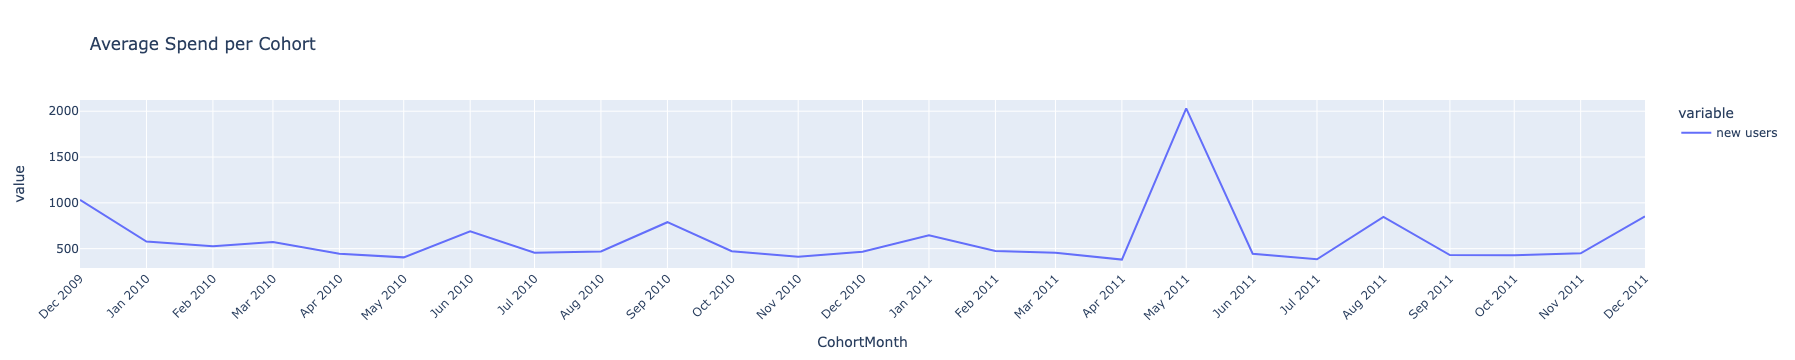

In [33]:
# create figure object:
fig = px.line(avg_cohort_spend_df, title='Average Spend per Cohort')

# rename legend:
for trace in fig.data:
    trace.name = 'new users'
    
#update x-axis:
fig.update_xaxes(tickangle=-45, nticks=len(avg_cohort_spend_df.index))
fig.show()

---

<div class="alert alert-block alert-info">
<h2>Let's look at churned customers per cohort (i.e. they buy once and never again...)</h2>
</div>

#### Start with the preprocessed retail df:

In [34]:
retail_df.head(10)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  CustomerID         Country   FirstPurchaseDate  \
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom 2009-12-01 07:45:00   
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom 2009-12-01 07:45:00   
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom 2009-12-01 07:45:00   
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom 2009-12-01 07:45:00   
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom 2009-12-01 07:45:00   
5 2009-12-01 07:45:00   1.65     13085.0  United Kingdom 2009-12-01 07:45:00   
6 2009-12-01 07:45:00   1.25     13085.0  United Kingdom 2009-12-01 07:45:00   
7 2009-12-01 07:45:00   5.95     13085.0  United Kingdom 2009-12-01 07:45:00   
8 2009-12-01 07:46:00   2.55     13085.0  United Kingdom 2009-12-01 07:45:00   
9 2009-12-01 07:46:00   3.75     13085.0  United Kingdom 2009-12-01 07:45:00   

   MonthsActive CohortMonth  OrderTotal  
0             0     2009-12        83.4  
1             0     2009-12        81.0  
2             0     2009-12        81.0  
3             0     2009-12       100.8  
4             0     2009-12        30.0  
5             0     2009-12        39.6  
6             0     2009-12        30.0  
7             0     2009-12        59.5  
8             0     2009-12        30.6  
9             0     2009-12        45.0

#### Aggregate on the number of purchases per cohort and active month to flatten the dataframe:

In [48]:
purchases_df = retail_df.groupby(['CohortMonth', 'MonthsActive','CustomerID']).agg(NumPurchases=('Invoice','count'), TotalSpend=('OrderTotal', 'sum')).reset_index()
purchases_df

CohortMonth  MonthsActive  CustomerID  NumPurchases  TotalSpend
0         2009-12             0     12346.0             5      113.50
1         2009-12             0     12358.0            17     1429.83
2         2009-12             0     12359.0            34      838.89
3         2009-12             0     12362.0             1      130.00
4         2009-12             0     12417.0            19      317.60
...           ...           ...         ...           ...         ...
25593     2011-12             0     16789.0             5       80.80
25594     2011-12             0     17914.0            80      336.43
25595     2011-12             0     17936.0            77      389.84
25596     2011-12             0     17942.0             2       77.50
25597     2011-12             0     18015.0            46      120.03

[25598 rows x 5 columns]

#### Get total number of months active per customer id (i.e. if number = 1, then churned)

In [58]:
churn_df = purchases_df.groupby(['CohortMonth', 'CustomerID'])['MonthsActive'].count().reset_index(name='NumMonthsActive')
churn_df = churn_df[churn_df['NumMonthsActive'] == 1]
churn_df

CohortMonth  CustomerID  NumMonthsActive
10       2009-12     12443.0                1
14       2009-12     12487.0                1
28       2009-12     12636.0                1
61       2009-12     12934.0                1
63       2009-12     12941.0                1
...          ...         ...              ...
5876     2011-12     16789.0                1
5877     2011-12     17914.0                1
5878     2011-12     17936.0                1
5879     2011-12     17942.0                1
5880     2011-12     18015.0                1

[1781 rows x 3 columns]

In [63]:
cohort_churn_df = churn_df.groupby('CohortMonth')['CustomerID'].count().reset_index(name='ChurnCount')
cohort_churn_df

CohortMonth  ChurnCount
0      2009-12          89
1      2010-01          50
2      2010-02          62
3      2010-03          84
4      2010-04          68
5      2010-05          60
6      2010-06          74
7      2010-07          52
8      2010-08          52
9      2010-09          79
10     2010-10         138
11     2010-11         152
12     2010-12          34
13     2011-01          33
14     2011-02          52
15     2011-03          67
16     2011-04          43
17     2011-05          42
18     2011-06          46
19     2011-07          36
20     2011-08          44
21     2011-09          94
22     2011-10         137
23     2011-11         165
24     2011-12          28

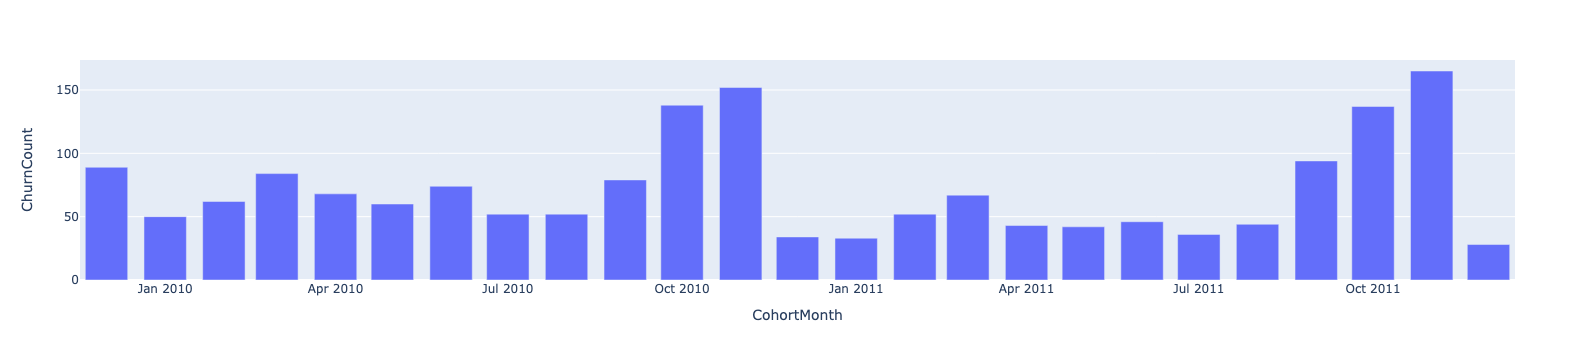

In [65]:
px.bar(cohort_churn_df, x='CohortMonth', y='ChurnCount')

---